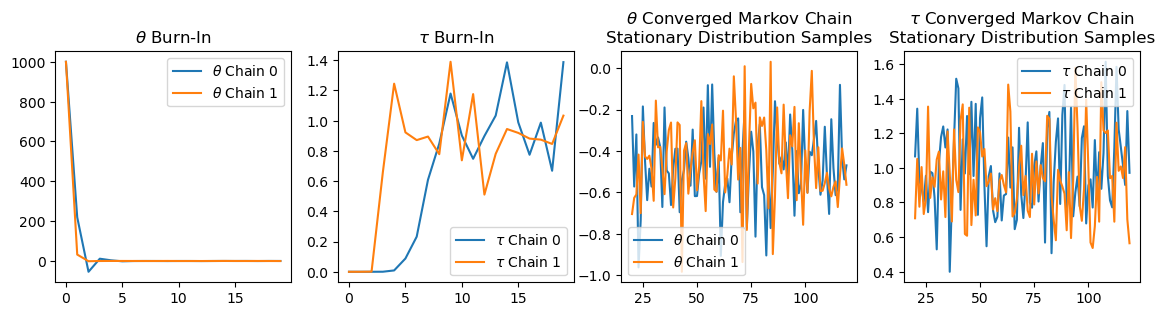

95% Credible Interval for θ: [-0.83649325 -0.07947168]
Posterior Mean for θ: -0.46260187885603854
Posterior Standard Deviation for θ: 0.19256871938472883


In [1]:
##Q1
import numpy as np
from scipy.stats import norm, gamma
import matplotlib.pyplot as plt

# Parameters
n = 30
x = norm(loc=0, scale=1).rvs(size=n)
C, G = 2, 10000  # Chains and Gibbs samples

# Initialize
theta = np.zeros([C, G])
tau = np.zeros([C, G])
theta[:, 0] = 1000  # Initialization

# Hyperparameters for priors
alpha = 2
lambda_param = 1

# Gibbs Sampling
for c in range(C):
    for g in range(1, G):
        # Sampling tau | theta, x (Gamma distribution)
        alpha_post = alpha + n / 2
        lambda_post = lambda_param + 0.5 * np.sum((x - theta[c, g - 1])**2)
        tau[c, g] = gamma.rvs(a=alpha_post, scale=1 / lambda_post)

        # Sampling theta | tau, x (Normal distribution)
        tau_theta = n * tau[c, g]
        mean_theta = np.sum(x) * tau[c, g] / tau_theta
        theta[c, g] = norm.rvs(loc=mean_theta, scale=1 / np.sqrt(tau_theta))
        # Plot Burn-In and Stationary Samples
fig, ax = plt.subplots(1, 4, figsize=(14, 3))
ax[0].set_title(r"$\theta$ Burn-In")
ax[1].set_title(r"$\tau$ Burn-In")
ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples")
ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
demo = 120

for c in range(C):
    ax[0].plot(theta[c, :burn], label=r"$\theta$ Chain " + str(c))
    ax[1].plot(tau[c, :burn], label=r"$\tau$ Chain " + str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c, burn:demo], label=r"$\theta$ Chain " + str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c, burn:demo], label=r"$\tau$ Chain " + str(c))

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
plt.show()

# Results
burn_in = 200
theta_samples = theta[:, burn_in:].flatten()
credible_interval_theta = np.percentile(theta_samples, [2.5, 97.5])
posterior_mean_theta = np.mean(theta_samples)
posterior_std_theta = np.std(theta_samples)

print("95% Credible Interval for θ:", credible_interval_theta)
print("Posterior Mean for θ:", posterior_mean_theta)
print("Posterior Standard Deviation for θ:", posterior_std_theta)

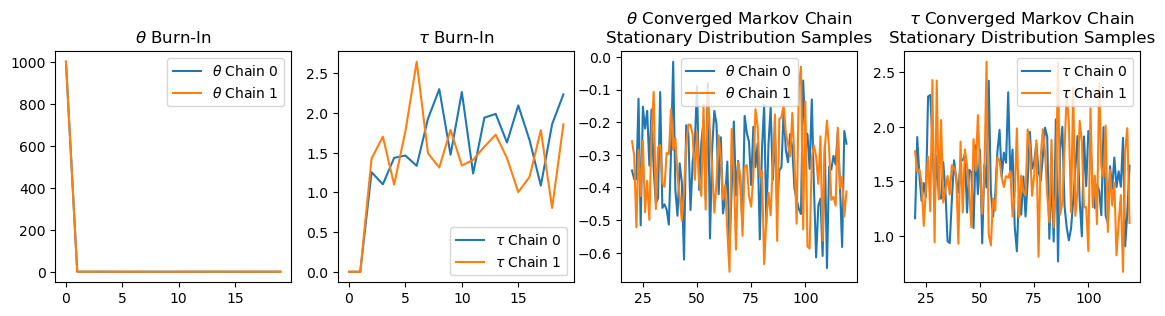

95% Credible Interval for θ: [-0.61608517 -0.02672124]
Posterior Mean for θ: -0.32376324544680196
Posterior Standard Deviation for θ: 0.14923117827026117
95% Credible Interval for τ: [0.8999798  2.35876298]


In [2]:
#Q2
import numpy as np
from scipy.stats import norm, gamma
import matplotlib.pyplot as plt

# Parameters
n = 30
x = norm(loc=0, scale=1).rvs(size=n)
C, G = 2, 10000  # Chains and Gibbs samples

# Initialize
theta = np.zeros([C, G])
tau = np.zeros([C, G])
theta[:, 0] = 1000  # Initialization

# Hyperparameters for priors
theta_0 = 0
tau_0 = 1
alpha = 2
lambda_param = 1

# Gibbs Sampling
for c in range(C):
    for g in range(1, G):
        # Sampling tau | theta, x (Gamma distribution)
        alpha_post = alpha + n / 2
        lambda_post = lambda_param + 0.5 * np.sum((x - theta[c, g - 1])**2)
        tau[c, g] = gamma.rvs(a=alpha_post, scale=1 / lambda_post)

        # Sampling theta | tau, x (Normal distribution)
        tau_theta = n * tau[c, g] + tau_0
        mean_theta = (np.sum(x) * tau[c, g] + theta_0 * tau_0) / tau_theta
        theta[c, g] = norm.rvs(loc=mean_theta, scale=1 / np.sqrt(tau_theta))

# Plot Burn-In and Stationary Samples
fig, ax = plt.subplots(1, 4, figsize=(14, 3))
ax[0].set_title(r"$\theta$ Burn-In")
ax[1].set_title(r"$\tau$ Burn-In")
ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples")
ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
demo = 120

for c in range(C):
    ax[0].plot(theta[c, :burn], label=r"$\theta$ Chain " + str(c))
    ax[1].plot(tau[c, :burn], label=r"$\tau$ Chain " + str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c, burn:demo], label=r"$\theta$ Chain " + str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c, burn:demo], label=r"$\tau$ Chain " + str(c))

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
plt.show()

# Results
burn_in = 200
theta_samples = theta[:, burn_in:].flatten()
tau_samples = tau[:, burn_in:].flatten()

credible_interval_theta = np.percentile(theta_samples, [2.5, 97.5])
credible_interval_tau = np.percentile(tau_samples, [2.5, 97.5])
posterior_mean_theta = np.mean(theta_samples)
posterior_std_theta = np.std(theta_samples)

print("95% Credible Interval for θ:", credible_interval_theta)
print("Posterior Mean for θ:", posterior_mean_theta)
print("Posterior Standard Deviation for θ:", posterior_std_theta)
print("95% Credible Interval for τ:", credible_interval_tau)